# Obstructive Sleep Apnea Syndrome (OSAS) classification
We use a publicly available dataset - [OSASUD](https://www.nature.com/articles/s41597-022-01272-y) (available [here](https://figshare.com/collections/A_dataset_of_stroke_unit_recordings_for_the_detection_of_Obstructive_Sleep_Apnea_Syndrome/5630890) to train a model to detect whether a patient is healthy or has any of the OSAS subtypes - HYPOPNEA, APNEA-CENTRAL, APNEA-OBSTRUCTIVE, APNEA-MIXED.
Dataset reference-
Bernardini A, Brunello A, Gigli GL, Montanari A, Saccomanno N. OSASUD: A dataset of stroke unit recordings for the detection of Obstructive Sleep Apnea Syndrome. Scientific Data. 2022 Apr;9(1):177. DOI: 10.1038/s41597-022-01272-y. PMID: 35440646; PMCID: PMC9018698.

## Data Analysis
We first load and analyze the data

### Imports

In [2]:
# Necessary imports
import pandas as pd
import numpy as np
import pickle
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt

### Data loading
The data is a pandas dataframe stored in 'data' folder as a _.pickle_ file. We load it and display the first few rows and the datatypes of each column

In [3]:
# Path to the dataset (assuming it is in the same directory as the notebook)
path = './data/dataset_OSAS.pickle'

# Loading the dataset
with open(path, 'rb') as file:
    dataset = pickle.load(file)
    
display(dataset.head(40))

display(dataset.dtypes)

,patient,timestamp_datetime,HR(bpm),SpO2(%),PI(%),RR(rpm),PVCs(/min),event,anomaly,signal_pleth,signal_ecg_i,signal_ecg_ii,signal_ecg_iii,PSG_Abdomen,PSG_Flow,PSG_Position,PSG_Snore,PSG_Thorax
0,1,2019-07-29 21:00:36,63.0,NaN,NaN,12.0,0.0,NONE,False,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[122, 121, 121, 120, 121, 123, 124, 125, 125, ...","[122, 121, 121, 120, 120, 122, 123, 124, 125, ...","[128, 128, 129, 128, 127, 127, 127, 128, 128, ...","[-0.8741500623767957, -0.9144675352463544, -0....","[-2.96563402995406, -2.9595796764374294, -2.95...","[-0.47401902530550133, -0.4739045513646679, -0...","[0.07924500093530636, 0.03509163903208667, 0.1...","[-0.3731332842321416, -0.3840816526328088, -0...."
1,1,2019-07-29 21:00:37,63.0,NaN,NaN,12.0,0.0,NONE,False,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[124, 125, 125, 124, 124, 124, 124, 124, 124, ...","[123, 124, 123, 123, 123, 122, 123, 123, 123, ...","[127, 127, 127, 127, 127, 126, 127, 128, 127, ...","[-0.9881929400632088, -0.9477638031010281, -0....","[-1.361721983810798, -0.5937676928280333, 0.10...","[-0.47401917910760316, -0.4739043984870266, -0...","[0.1730628474409785, 0.05274774088651335, 0.07...","[-0.3271092235750278, -0.34422787330023297, -0..."
2,1,2019-07-29 21:00:38,64.0,NaN,NaN,12.0,0.0,NONE,False,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[124, 124, 124, 124, 123, 124, 124, 124, 124, ...","[123, 124, 124, 124, 124, 124, 124, 124, 124, ...","[127, 128, 128, 128, 129, 128, 128, 128, 128, ...","[0.08614440036034249, 0.2516121296765992, 0.42...","[1.106683267015266, 1.0603761242579164, 1.0141...","[-0.4740193239619996, -0.47390425449218476, -0...","[0.17804040728101125, 0.11939900653197982, 0.1...","[-0.12950805941595078, -0.11899340882221601, -..."
3,1,2019-07-29 21:00:39,64.0,NaN,NaN,12.0,0.0,NONE,False,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[124, 124, 124, 124, 123, 124, 123, 123, 124, ...","[126, 126, 126, 126, 126, 125, 126, 126, 126, ...","[130, 130, 130, 130, 131, 129, 131, 131, 131, ...","[1.1531959630520392, 1.1005866213221034, 1.014...","[-0.9214725025271104, -0.9771933825390473, -1....","[-0.4740194604923075, -0.4739041187620709, -0....","[0.04909074879934492, 0.1211243456818879, 0.20...","[0.014197466691675964, 0.05145753481049522, 0...."
4,1,2019-07-29 21:00:40,64.0,NaN,NaN,12.0,0.0,NONE,False,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[123, 124, 125, 124, 124, 124, 124, 124, 124, ...","[128, 127, 126, 125, 126, 127, 126, 125, 125, ...","[133, 131, 129, 129, 130, 131, 130, 130, 129, ...","[-0.42549812754662325, -0.5447443993201948, -0...","[-1.035218708573095, -1.0000002320633845, -0.9...","[-0.47401958926922777, -0.47390399073098, -0.4...","[0.020529048615559067, 0.5111613725192, 0.0863...","[-0.004534125269965855, -0.04243555140344553, ..."
5,1,2019-07-29 21:00:41,65.0,NaN,NaN,12.0,0.0,NONE,False,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[123, 123, 123, 123, 123, 123, 123, 123, 124, ...","[121, 121, 121, 122, 122, 121, 121, 122, 123, ...","[126, 126, 126, 127, 127, 126, 126, 127, 127, ...","[-0.9010658563819915, -0.9832035495837318, -1....","[-0.6370930257536307, -0.639692857936591, -0.6...","[-0.4740197108157983, -0.4739038698803675, -0....","[0.16661318949434478, 0.009342838785474459, 0....","[-0.2737509767782041, -0.23926478130192888, -0..."
6,1,2019-07-29 21:00:42,66.0,NaN,NaN,12.0,0.0,NONE,False,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[128, 128, 127, 123, 123, 122, 122, 122, 122, ...","[127, 127, 124, 122, 120, 119, 119, 119, 119, ...","[127, 127, 126, 127, 125, 125, 125, 126, 126, ...","[-1.060911911130421, -1.0642011533917133, -1.0...","[-0.6206899582817932, -0.5977987561784777, -0....","[-0.47401982561207184, -0.4739037557342492, -0...","[0.31562760731192785, 0.24134828012570442, 0.0...","[-0.1452583203587483, -0.14293206117014795, -0..."
7,1,2019-07-29 21:00:43,66.0,NaN,NaN,12.0,0.0,NONE,False,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[157, 184, 141, 123, 1

patient                       object
timestamp_datetime    datetime64[ns]
HR(bpm)                      float64
SpO2(%)                      float64
PI(%)                        float64
RR(rpm)                      float64
PVCs(/min)                   float64
event                         object
anomaly                      boolean
signal_pleth                  object
signal_ecg_i                  object
signal_ecg_ii                 object
signal_ecg_iii                object
PSG_Abdomen                   object
PSG_Flow                      object
PSG_Position                  object
PSG_Snore                     object
PSG_Thorax                    object
dtype: object

### Number of classes
We display the class names that the model needs to classify

In [4]:
dataset['event'].unique()

array(['NONE', 'HYPOPNEA', 'APNEA-CENTRAL', 'APNEA-OBSTRUCTIVE',
       'APNEA-MIXED'], dtype=object)

As we can see from above, this is a five class classification problem.

Now we display some basic information about the dataset

In [5]:
print("Number of rows:", dataset.shape[0])
print("Number of columns:", dataset.shape[1])
print("Number of distinct patients:", len(dataset['patient'].unique()))

Number of rows: 961357
Number of columns: 18
Number of distinct patients: 30


### Create a summary of dataframe
We create a summary about the dataframe containing the number of recorded hours, number of apnea, hypopnea events and information about null/missing values/

In [6]:
# Function that, given an array of boolean values, outputs the "begin_index" and "end_index" of each contiguous block of TRUEs
def one_runs(a):
    iszero = np.concatenate(([0], np.equal(a, 1).astype(np.int8), [0]))
    absdiff = np.abs(np.diff(iszero))
    ranges = np.where(absdiff == 1)[0].reshape(-1, 2)
    return ranges

# Calculate validation data for each patient
validation_pandas = []
pbar = tqdm(desc="Processed patients", total=len(dataset['patient'].unique()))
for pat in np.unique(dataset['patient'])[np.argsort(np.unique(dataset['patient']).astype(np.int8))]:
    temp = dataset[dataset['patient'] == pat]

    tmp_null_pleth = np.asarray([np.isnan(x) for x in temp['signal_pleth']]).flatten()
    tmp_null_ecg_i = np.asarray([np.isnan(x) for x in temp['signal_ecg_i']]).flatten()
    tmp_null_ecg_ii = np.asarray([np.isnan(x) for x in temp['signal_ecg_ii']]).flatten()
    tmp_null_ecg_iii = np.asarray([np.isnan(x) for x in temp['signal_ecg_iii']]).flatten()

    pandas_row = [pat, # patient ID
                  round(len(temp) / 3600, 1), # recording duration (hours)
                  round(len(one_runs(temp['anomaly'].values)) / (len(temp) / 3600), 1), # AHI
                  len(one_runs(temp[temp['event'] != 'HYPOPNEA']['anomaly'])), # number of apnea events
                  len(one_runs(temp[(temp['event'] != 'APNEA-CENTRAL') & (temp['event'] != 'APNEA-MIXED') & (temp['event'] != 'APNEA-OBSTRUCTIVE')]['anomaly'])), # number of hypopnea events
                  round(np.mean([x[1] - x[0] + 1 for x in one_runs(temp['anomaly'].values)])), # average duration of (hypo)apnea events (seconds)
                  round(np.std([x[1] - x[0] + 1 for x in one_runs(temp['anomaly'].values)])), # standard deviation of the duration of (hypo)apnea events (seconds)
                  round(100 * np.sum(np.isnan(temp['HR(bpm)'])) / len(temp), 1), # percentage of null HR values
                  round(100 * np.sum(np.isnan(temp['SpO2(%)'])) / len(temp), 1), # percentage of null SpO2 values
                  round(100 * np.sum(np.isnan(temp['PI(%)'])) / len(temp), 1), # percentage of null PI values
                  round(100 * np.sum(np.isnan(temp['RR(rpm)'])) / len(temp), 1), # percentage of null RR values
                  round(100 * np.sum(np.isnan(temp['PVCs(/min)'])) / len(temp), 1), # percentage of null PVC values
                  round(100 * np.sum(tmp_null_pleth) / len(tmp_null_pleth), 1), # percentage of null pleth values,
                  round(100 * np.sum(tmp_null_ecg_i) / len(tmp_null_ecg_i), 1), # percentage of null ecg i values,
                  round(100 * np.sum(tmp_null_ecg_ii) / len(tmp_null_ecg_ii), 1), # percentage of null ecg ii values,
                  round(100 * np.sum(tmp_null_ecg_iii) / len(tmp_null_ecg_iii), 1), # percentage of null ecg iii values
                 ]

    validation_pandas.append(pandas_row)

    pbar.update(1)


validation_pandas = pd.DataFrame(validation_pandas, columns=['patient',
                                                             'recording duration (hrs)',
                                                             'AHI',
                                                             '# apnea events',
                                                             '# hypopnea events',
                                                             'avg duration (hypo)apnea events',
                                                             'stddev duration (hypo)apnea events',
                                                             '% null HR',
                                                             '% null SpO2',
                                                             '% null PI',
                                                             '% null RR',
                                                             '% null PVC',
                                                             '% null pleth',
                                                             '% null ecg i',
                                                             '% null ecg ii',
                                                             '% null ecg iii'
                                                            ])

display(validation_pandas)

# Save the dataframe to a csv file
# validation_pandas.to_csv('patient_data.csv')

Processed patients:   0%|          | 0/30 [00:00<?, ?it/s]

,patient,recording duration (hrs),AHI,# apnea events,# hypopnea events,avg duration (hypo)apnea events,stddev duration (hypo)apnea events,% null HR,% null SpO2,% null PI,% null RR,% null PVC,% null pleth,% null ecg i,% null ecg ii,% null ecg iii
0,1,7.0,39.7,142,136,22,8,0.0,8.3,8.5,0.0,0.0,8.2,0.0,0.0,0.0
1,2,11.9,10.2,29,93,20,8,0.0,6.1,6.1,0.0,0.0,6.1,0.3,0.0,53.8
2,3,7.1,63.1,242,208,25,10,0.0,0.2,0.4,2.7,0.0,0.0,0.0,0.0,0.0
3,4,9.0,10.4,52,42,34,15,0.3,0.2,0.3,0.7,0.3,0.2,1.4,0.2,1.4
4,5,9.1,35.4,42,280,23,12,1.9,3.6,3.6,1.6,1.9,3.4,1.5,1.4,1.5
5,6,4.1,58.4,87,150,20,4,0.9,1.6,1.9,0.1,0.9,0.0,0.0,0.0,0.0
6,7,9.2,29.9,72,203,16,3,0.0,11.1,11.2,1.2,0.0,10.9,0.0,0.0,0.0
7,8,9.0,1.4,3,10,17,3,0.0,12.1,12.1,0.0,0.0,11.8,0.0,0.0,0.0
8,9,9.5,8.1,24,53,18,5,0.3,13.4,13.5,0.4,0.3,13.3,0.3,0.3,0.3
9,10,11.4,41.4,265,207,21,6,5.8,17.8,17.9,5.9,5.8,17.5,5.8,5.8,5.8


### Box plot of features

Processed features:   0%|          | 0/5 [00:00<?, ?it/s]

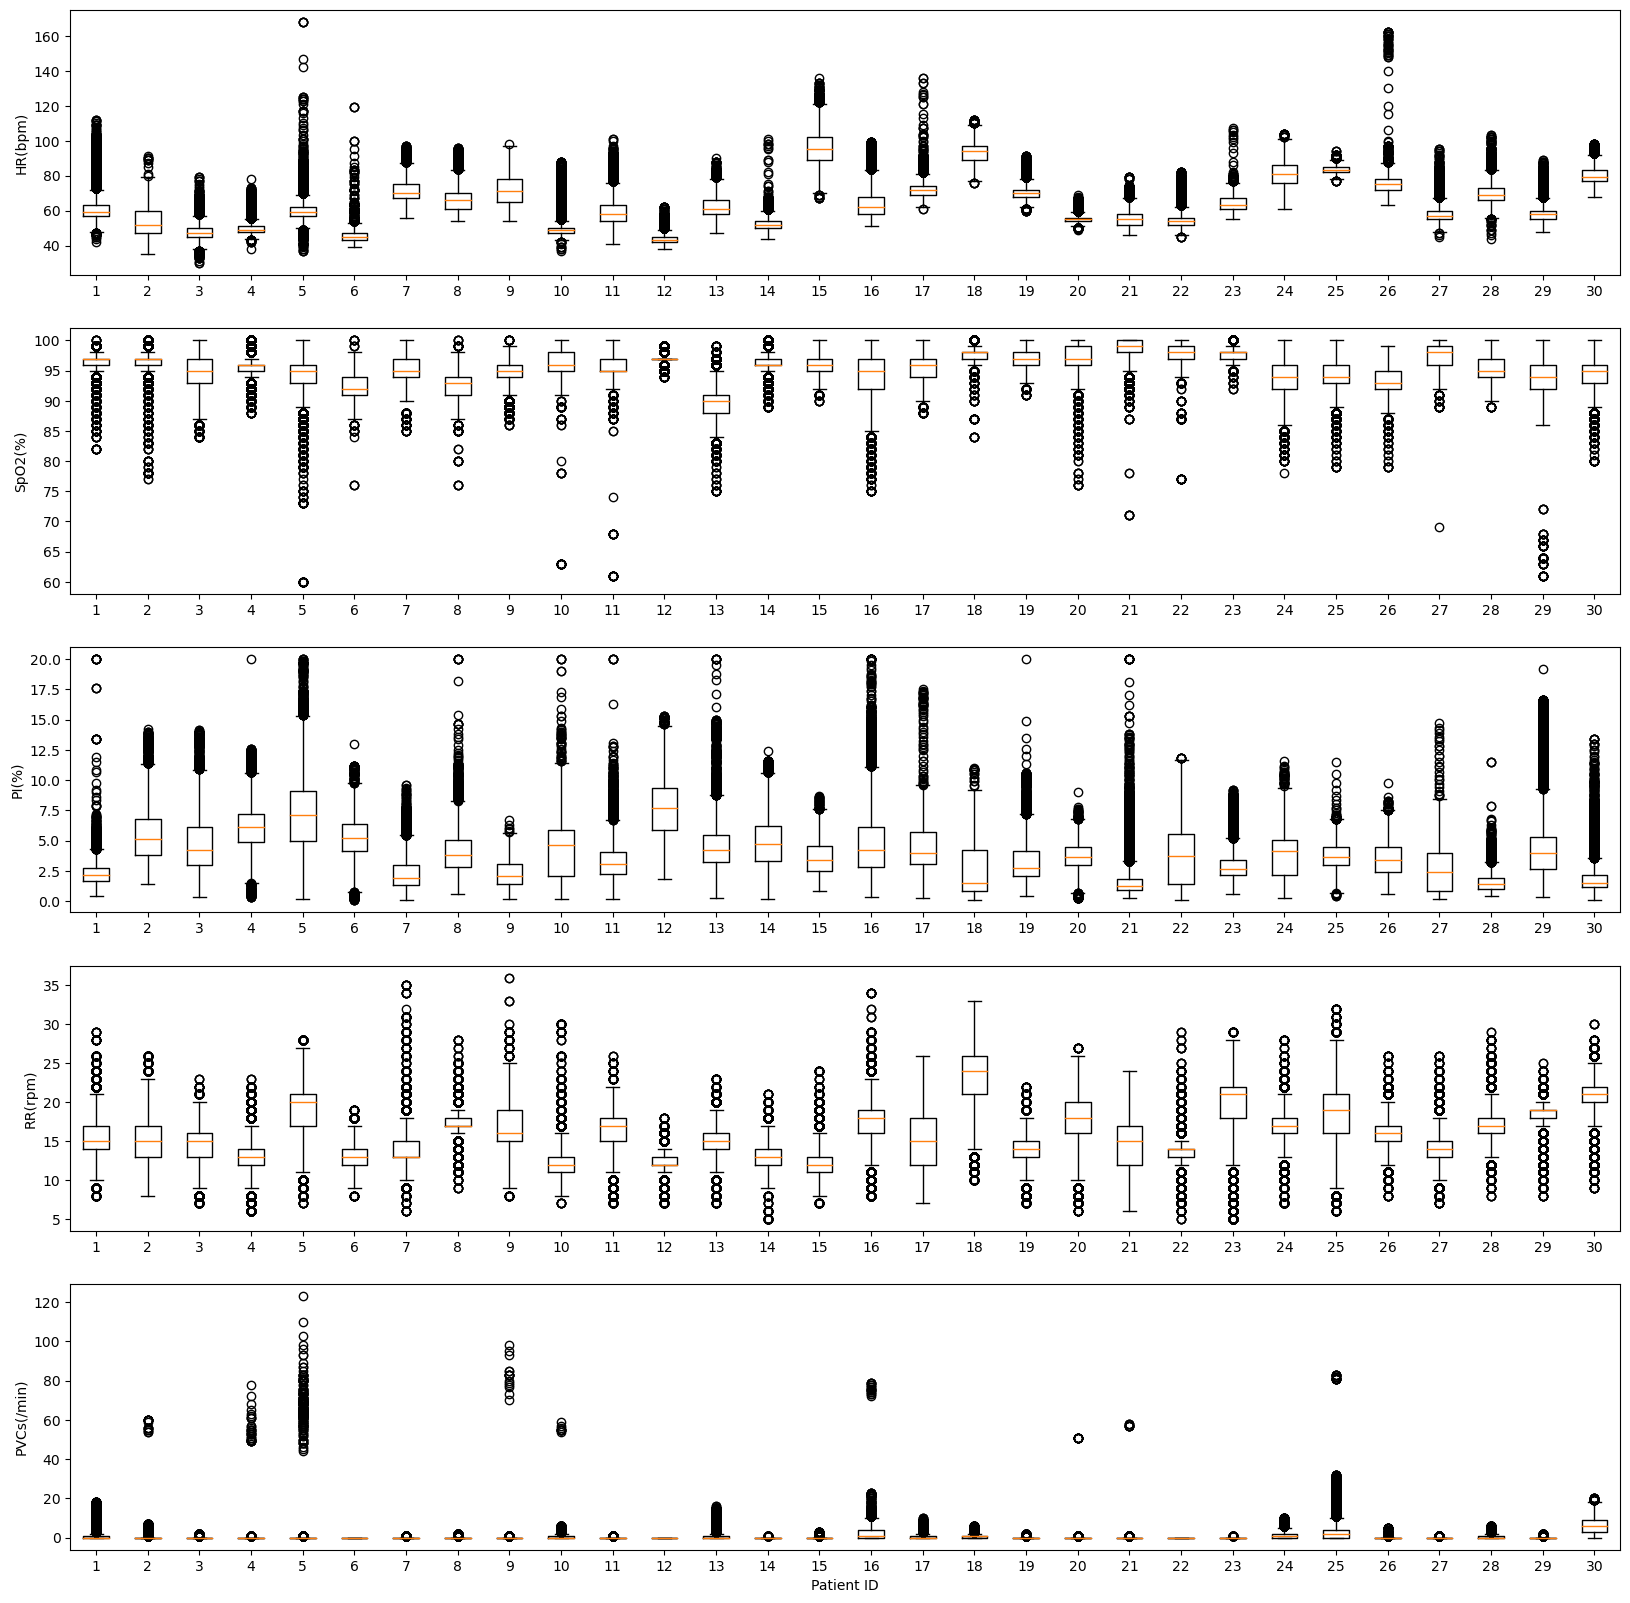

In [7]:
# Boxplots of the ECG and PPG derived data
plt.figure(figsize=(20, 20))
pbar = tqdm(desc="Processed features", total=5)
for i, column in enumerate(['HR(bpm)', 'SpO2(%)', 'PI(%)', 'RR(rpm)', 'PVCs(/min)']):
    plt.subplot(5, 1, i+1)
    plot_data = []
    for pat in np.unique(dataset['patient'])[np.argsort(np.unique(dataset['patient']).astype(np.int8))]:
        temp = dataset[dataset['patient'] == pat][column]
        plot_data.append([x for x in list(temp.values) if not np.isnan(x)])
    plt.boxplot(plot_data)
    if i == 4:
        plt.xlabel("Patient ID")
    plt.ylabel(column)
    pbar.update(1)
pbar.close()
plt.show()

### Patient wise re-assembly
We create a python dictionary that has the patient id as keys and all the features are encoded as another dictionary which is the value of patient key.

In [8]:
# The following code re-assembles the time series related to each patient
patient_map_features = {} # given a patient, the map returns a map that, given feature, returns its whole time series
pbar = tqdm(desc="Processed patients", total=len(dataset['patient'].unique()))
for pat in dataset['patient'].unique():
    temp = dataset[dataset['patient'] == pat]
    feature_map_ts = {}
    for col in dataset.columns[1:]:
        if 'signal' not in col and 'PSG_' not in col:
            feature_map_ts[col] = temp[col].values
        else:
            feature_map_ts[col] = np.concatenate(temp[col].values)
    patient_map_features[pat] = feature_map_ts
    pbar.update(1)
pbar.close()

Processed patients:   0%|          | 0/30 [00:00<?, ?it/s]

### Example plots using the above dictionary
We can now plot any feature value by giving the patient id and column name. We can also control how much information to show by slicing the data upto our required number of seconds.
For example-
`patient_map_features['15']['PI(%)'][:20000]` shows the first **20000** seconds of feature **PI(%)** for patient **15**

#### Perfusion Index (PI)

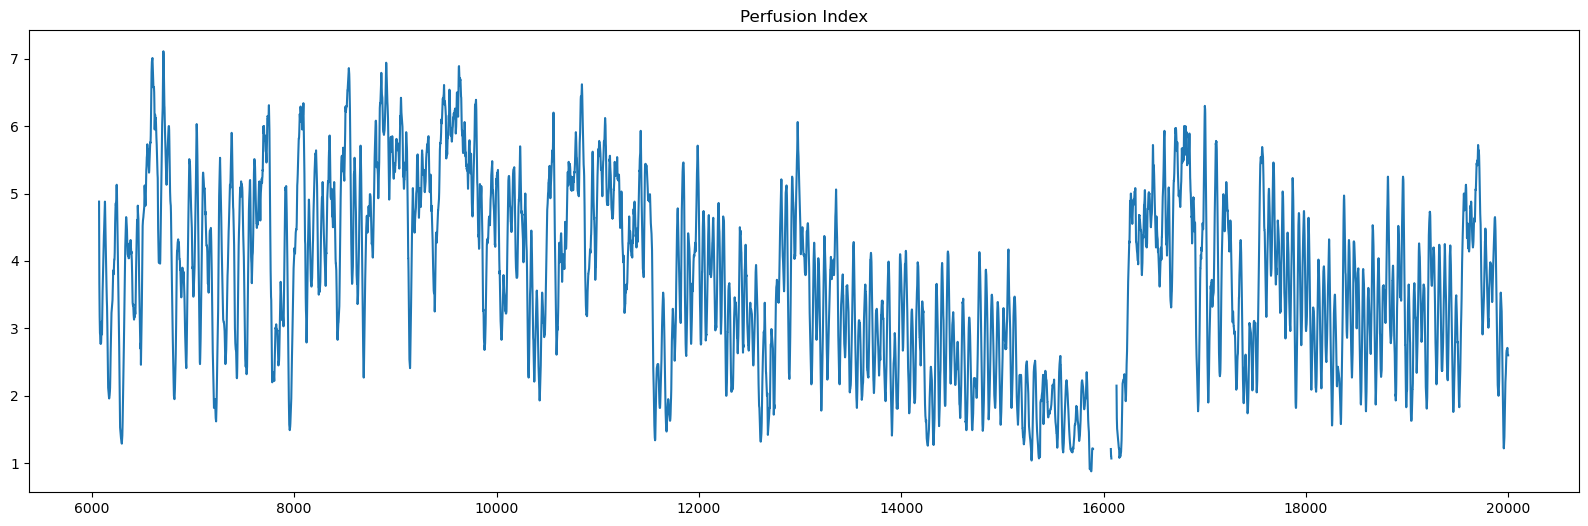

In [9]:
# PI time series of patient 1. Observe that there are some outlier values that might be usefult correcting, for example using a weighting average approach.
plt.figure(figsize=(20, 6))
plt.title('Perfusion Index')
plt.plot(patient_map_features['15']['PI(%)'][:20000])
plt.show()

#### SpO2 signal
We show another example - first 2000 seconds of SpO2 of patient 10

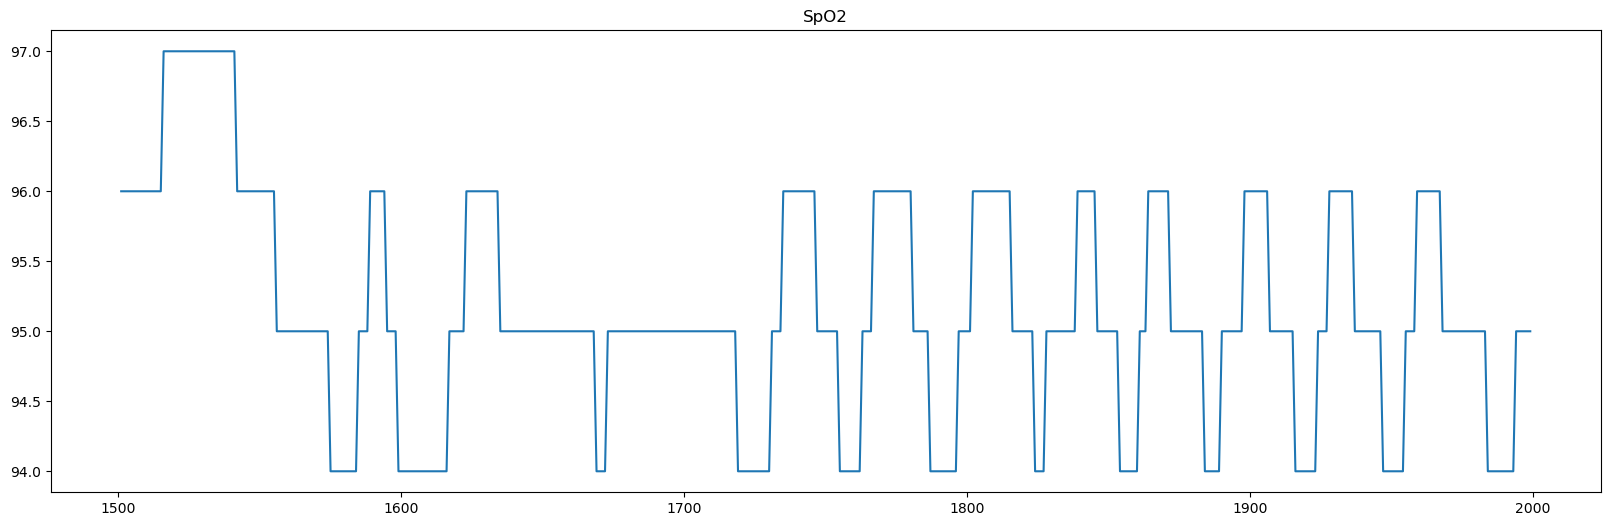

In [10]:
plt.figure(figsize=(20, 6))
plt.title('SpO2')
plt.plot(patient_map_features['10']['SpO2(%)'][:2000])
plt.show()

#### PSG Abdomen signal
First 2000 seconds of PSG_Abdomen of patient 2

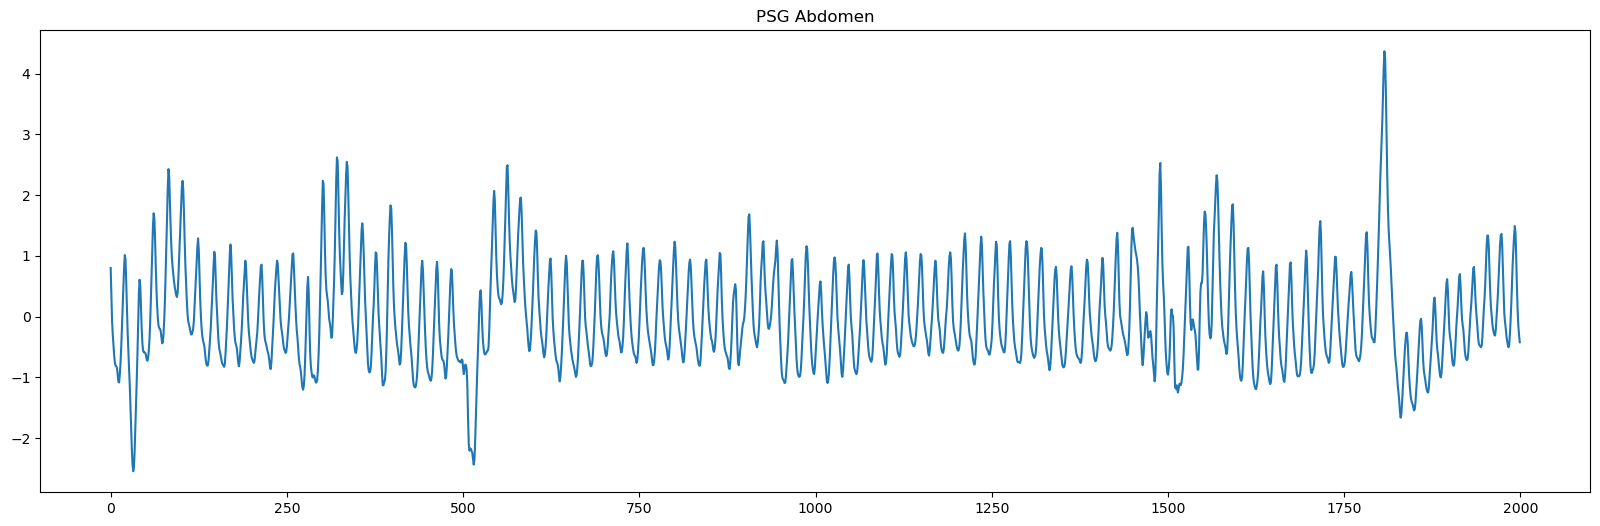

In [11]:
# Outliers produced by movements in patient 10's PSG_Abdomen time series
plt.figure(figsize=(20, 6))
plt.title('PSG Abdomen')
plt.plot(patient_map_features['2']['PSG_Abdomen'][:2000])
plt.show()

#### ECG Signal 2

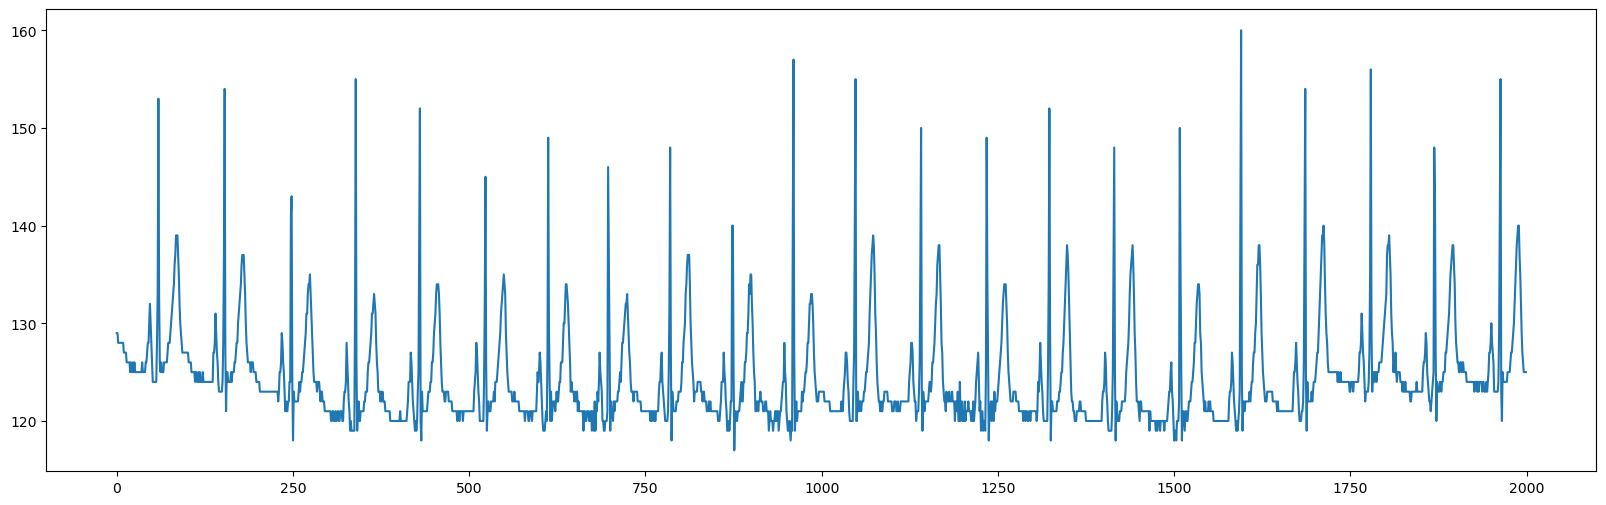

In [12]:
plt.figure(figsize=(20, 6))
plt.plot(patient_map_features['3']['signal_ecg_ii'][:2000])
plt.show()

## PSG Flow

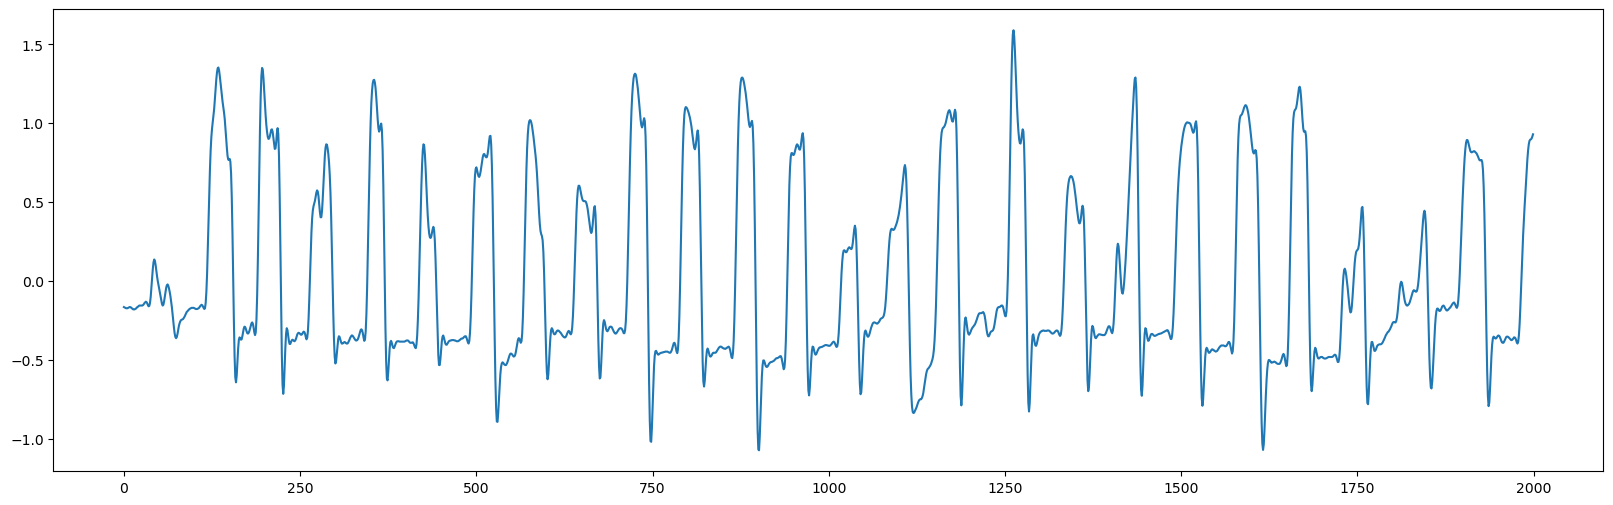

In [13]:
plt.figure(figsize=(20, 6))
plt.plot(patient_map_features['3']['PSG_Flow'][:2000])
plt.show()

In [14]:
# The following code generates a set of numpy arrays that can be used for machine learning purposes
# Each row of every numpy array contains information related to windows of length "window_seconds"
# Here, "PSG_" signal data is not considered

window_seconds = 60 # length, in seconds, of each data window. Here, windows are disjoint, but it might be useful to generate overlapping windows so to consider 

derived_data = [] # will be a numpy array containing ECG and PPG derived data
waveform_data = [] # will be a numpy array containing ECG and PPG waveform data
label_data = [] # will be a numpy array containing the "event" and anomaly" data labels

list_patients = [] # list that keeps track of the patient ID for each row in the arrays
list_derived_columns = [] # list that keeps track of the column names in the derived_data numpy array (last dimension)
list_waveform_columns = [] # list that keeps track of the column names in the waveform_data numpy array (last dimension)
list_label_columns = [] # list that keeps track of the column names in the label_data numpy array (last dimension)


pbar = tqdm(desc="Processed patients", total=len(dataset['patient'].unique()))
for pat in patient_map_features.keys():
    num_values = len(patient_map_features[pat]['HR(bpm)'])
    max_values = (num_values // window_seconds) * window_seconds
    print("Patient", pat, " >  Discarding the last", num_values - max_values, 'seconds.')
    
    # Derived data
    temp_list_derived = []
    derived_colnames = []
    for col in patient_map_features[pat]:
        if np.any([x == col for x in ['HR(bpm)', 'SpO2(%)', 'PI(%)', 'RR(rpm)', 'PVCs(/min)']]):
            temp_list_derived.append(np.asarray(patient_map_features[pat][col][:max_values]).reshape(-1, window_seconds))
            derived_colnames.append(col)
    temp_list_derived = np.moveaxis(np.asarray(temp_list_derived), [0, 1, 2], [2, 0, 1])
    derived_data.append(temp_list_derived)
    if len(list_derived_columns) == 0:
        list_derived_columns = derived_colnames
    
    # Waveform data
    temp_list_waveform = []
    waveform_colnames = []
    for col in patient_map_features[pat]:
        if 'signal' in col:
            temp_list_waveform.append(np.asarray(patient_map_features[pat][col][:max_values*80]).reshape(-1, window_seconds, 80))
            waveform_colnames.append(col)
    temp_list_waveform = np.moveaxis(np.asarray(temp_list_waveform), [0, 1, 2, 3], [3, 0, 1, 2])
    waveform_data.append(temp_list_waveform)    
    if len(list_waveform_columns) == 0:
        list_waveform_columns = waveform_colnames
    
    # Label data
    temp_list_label = []
    label_colnames = []
    for col in patient_map_features[pat]:
        if col == 'anomaly' or col == 'event':
            temp_list_label.append(np.asarray(patient_map_features[pat][col][:max_values]).reshape(-1, window_seconds))
            label_colnames.append(col)
    temp_list_label = np.moveaxis(np.asarray(temp_list_label), [0, 1, 2], [2, 0, 1])
    label_data.append(temp_list_label)
    if len(list_label_columns) == 0:
        list_label_columns = label_colnames
    
    # Auxiliary data that keeps track of the patient related to each row
    list_patients.extend([pat] * temp_list_derived.shape[0])
    
    pbar.update(1)
pbar.close()
    
    
derived_data = np.vstack(derived_data) # 16008 windows, of 60 seconds each, for 5 attributes
waveform_data = np.vstack(waveform_data) # 16008 windows, of 60 seconds each, 80 values per second, for 4 attributes
label_data = np.vstack(label_data) # 16008 windows, of 60 seconds each, for 2 labels

print(derived_data.shape, waveform_data.shape, label_data.shape)
print(len(list_patients), len(list_derived_columns), len(list_waveform_columns), len(list_label_columns))

Processed patients:   0%|          | 0/30 [00:00<?, ?it/s]

Patient 1  >  Discarding the last 38 seconds.
Patient 10  >  Discarding the last 18 seconds.
Patient 11  >  Discarding the last 40 seconds.
Patient 12  >  Discarding the last 26 seconds.
Patient 13  >  Discarding the last 16 seconds.
Patient 14  >  Discarding the last 20 seconds.
Patient 15  >  Discarding the last 45 seconds.
Patient 16  >  Discarding the last 20 seconds.
Patient 17  >  Discarding the last 7 seconds.
Patient 18  >  Discarding the last 55 seconds.
Patient 2  >  Discarding the last 37 seconds.
Patient 19  >  Discarding the last 11 seconds.
Patient 20  >  Discarding the last 13 seconds.
Patient 21  >  Discarding the last 50 seconds.
Patient 22  >  Discarding the last 32 seconds.
Patient 23  >  Discarding the last 6 seconds.
Patient 24  >  Discarding the last 32 seconds.
Patient 25  >  Discarding the last 38 seconds.
Patient 26  >  Discarding the last 53 seconds.
Patient 3  >  Discarding the last 2 seconds.
Patient 27  >  Discarding the last 32 seconds.
Patient 28  >  Disc

## Data preprocessing

### Baseline wandering correction
Baseline wandering correction is done using wavelets (Discrete wavelet transform). Refer to [https://github.com/spebern/py-bwr](https://github.com/spebern/py-bwr) for implementation details.

In [15]:
from bwr import calc_baseline

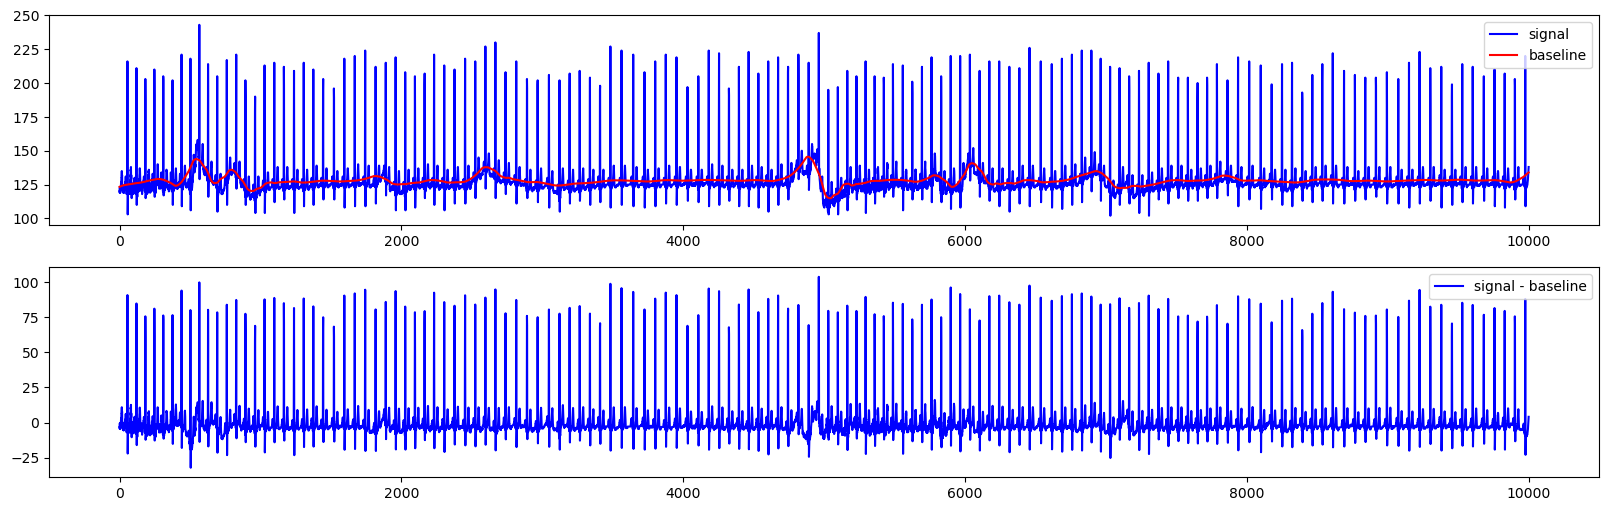

In [16]:
signal = patient_map_features['7']['signal_ecg_ii'][:10000]
# Call the BWR method
baseline = calc_baseline(signal)

# Remove baseline from orgianl signal
ecg_out = signal - baseline
plt.figure(figsize=(20,6))
plt.subplot(2, 1, 1)
plt.plot(signal, "b-", label="signal")
plt.plot(baseline, "r-", label="baseline")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(ecg_out, "b-", label="signal - baseline")
plt.legend()
plt.show()

### Power Spectral density
Calculated using Welch's method.
P. Welch, “The use of the fast Fourier transform for the estimation of power spectra: A method based on time averaging over short, modified periodograms”, IEEE Trans. Audio Electroacoust. vol. 15, pp. 70-73, 1967.

The implementation of the method is available at [SciPy](https://scipy.org/). Refer [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html) for details.

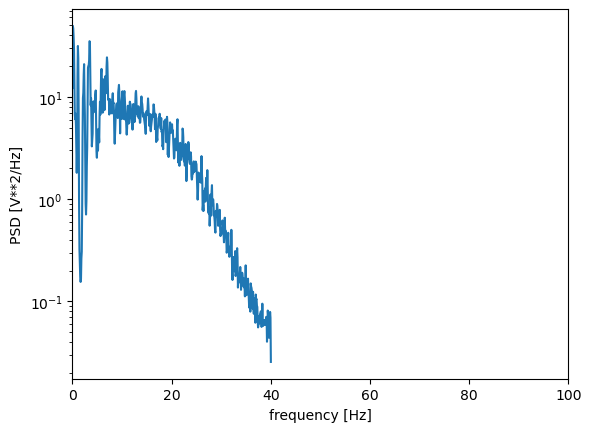

In [17]:
import scipy

(f, S)= scipy.signal.welch(signal, fs=80, nperseg=1024) # fs = Sampling frequency, window = Hann Window by default, nperseg = Length of each segment.

plt.semilogy(f, S)
plt.xlim([0, 100])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

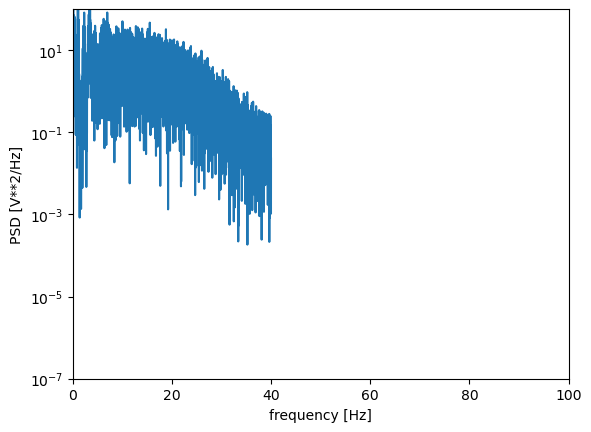

In [18]:
# f contains the frequency components
# S is the PSD
(f, S) = scipy.signal.periodogram(signal, fs=80, scaling='density')

plt.semilogy(f, S)
plt.ylim([1e-7, 1e2])
plt.xlim([0,100])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()